In [187]:
#Capstone Project SpaceX
#Author: Joshua Pam

In [240]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=05d5b9f2cecf532e497afd30aae97c70ad35590731816d9ca477bae1f5fa0b9a
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [241]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from datetime import datetime
import folium
import wget
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [189]:
#Call Dataframe

data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Text(0.5, 0, 'Launch Site')

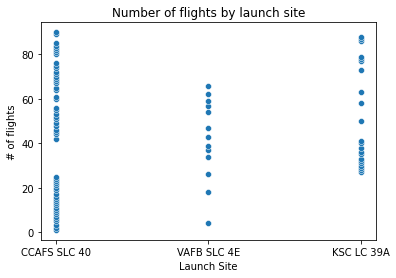

In [190]:
#EDA

#Flight number vs. launch site scatterplot

ax = sns.scatterplot(data=data, x='LaunchSite', y='FlightNumber')
plt.title("Number of flights by launch site")
plt.ylabel('# of flights')
plt.xlabel('Launch Site')

Text(0.5, 0, 'Launch Site')

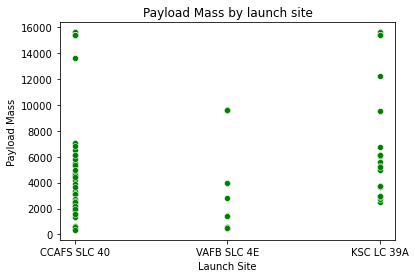

In [191]:
#Payload by launch site

ax = sns.scatterplot(data=data, x='LaunchSite', y='PayloadMass', color='green')
plt.title("Payload Mass by launch site")
plt.ylabel('Payload Mass')
plt.xlabel('Launch Site')

Text(0, 0.5, '# of Successes')

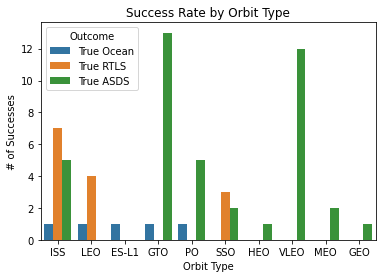

In [192]:
#Success rate of orbit type bar plot

data.loc[(data['Outcome'] == 'True ASDS'), 'S/F'] = "Success"
data.loc[(data['Outcome'] == 'True Ocean'), 'S/F'] = "Success"
data.loc[(data['Outcome'] == 'True RTLS'), 'S/F'] = "Success"
data.loc[(data['Outcome'] == 'None None'), 'S/F'] = "Failure/None"
data.loc[(data['Outcome'] == 'None ASDS'), 'S/F'] = "Failure/None"
data.loc[(data['Outcome'] == 'False RTLS'), 'S/F'] = "Failure/None"
data.loc[(data['Outcome'] == 'False Ocean'), 'S/F'] = "Failure/None"

good_outcome = data[data['S/F'] == 'Success']

ax = sns.countplot(data=good_outcome, x='Orbit', hue='Outcome')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('# of Successes')

Text(0, 0.5, '# of Flights')

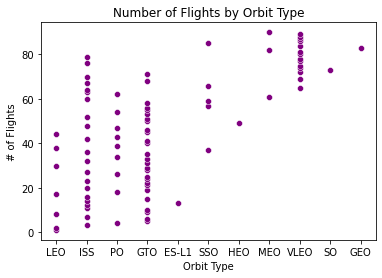

In [193]:
#Flight Number vs. Orbit Type scatter plot

ax = sns.scatterplot(data=data, x='Orbit', y='FlightNumber', color='purple')
plt.title('Number of Flights by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('# of Flights')

Text(0, 0.5, 'Payload Mass')

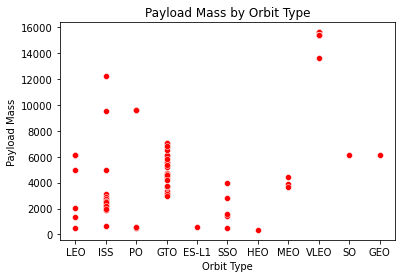

In [194]:
#Payload vs. Orbit Type scatter plot

ax = sns.scatterplot(data=data, x='Orbit', y='PayloadMass', color='red')
plt.title('Payload Mass by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass')

/tmp/wsuser/ipykernel_132/2873034612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_outcome['Date'] = pd.to_datetime(good_outcome['Date'])
/tmp/wsuser/ipykernel_132/2873034612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_outcome['Year'] = pd.to_datetime(good_outcome['Date']).dt.year


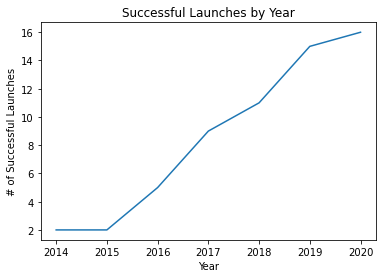

In [195]:
#Show a line chart of yearly average success rate

good_outcome['Date'] = pd.to_datetime(good_outcome['Date'])
good_outcome['Year'] = pd.to_datetime(good_outcome['Date']).dt.year

line_df = good_outcome[['Outcome', 'Year']]
counts = np.array(line_df['Year'].value_counts())
years = line_df['Year'].unique()

proper_count = counts[::-1]

plt.title('Successful Launches by Year')
plt.xlabel('Year')
plt.ylabel('# of Successful Launches')
plt.plot(years, proper_count)


In [196]:
# Predictive Analysis w/ Machine Learning

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
arr = data['Class'].to_numpy()
Y = np.array(arr)

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [197]:
# Decision Tree Classifier

parameters1 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
cv_value=10
tree_cv = GridSearchCV(tree, parameters1, scoring='accuracy',cv = cv_value)
tree_cv = tree_cv.fit(X_train, y_train)
Best_DT = tree_cv.best_estimator_
DT_acc_score = Best_DT.score(X_test, y_test)
print('Accuracy score of the Decision Tree Classifier Model with Test data: ', DT_acc_score )

Accuracy score of the Decision Tree Classifier Model with Test data:  0.8518518518518519


In [198]:
# KNN

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
cv_value=10
knn_cv = GridSearchCV(KNN, parameters, scoring='accuracy',cv = cv_value)
knn_cv = knn_cv.fit(X_train, y_train)
Best_knn = knn_cv.best_estimator_
knn_acc_score = Best_knn.score(X_test, y_test)
print('Accuracy score of the K Nearest Neighbors Model with Test data: ', knn_acc_score )


Accuracy score of the K Nearest Neighbors Model with Test data:  0.8148148148148148


In [199]:
# Logistic Regression

parameters3 ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
cv_value=10
lr_cv = GridSearchCV(lr, parameters3, scoring='accuracy',cv = cv_value)
lr_cv = lr_cv.fit(X_train, y_train)
Best_lr = lr_cv.best_estimator_
lr_acc_score = lr_cv.score(X_test, y_test)
print('Accuracy score of the Logistic Regression Model with Test data: ', lr_acc_score )

Accuracy score of the Logistic Regression Model with Test data:  0.8888888888888888


In [200]:
# SVM

parameters4 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
cv_value=10
svm_cv = GridSearchCV(svm, parameters4, scoring='accuracy',cv = cv_value)
svm_cv = svm_cv.fit(X_train, y_train)
Best_svm = svm_cv.best_estimator_
svm_acc_score = svm_cv.score(X_test, y_test)
print('Accuracy score of the Support Vector Machine Model with Test data: ', svm_acc_score )

Accuracy score of the Support Vector Machine Model with Test data:  0.8518518518518519


Text(0, 0.5, 'Accuracy Score')

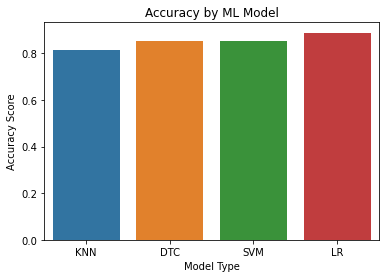

In [201]:
# Plot the results

model = ['KNN', 'DTC', 'SVM', 'LR']
accuracy = [knn_acc_score, DT_acc_score, svm_acc_score, lr_acc_score]

sns.barplot(x=model, y=accuracy)
plt.title('Accuracy by ML Model')
plt.xlabel('Model Type')
plt.ylabel('Accuracy Score')

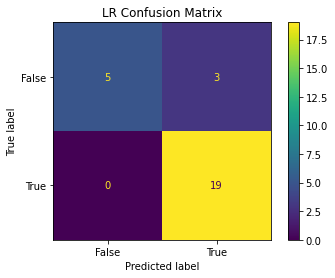

In [268]:
# Best Model Confusion Matrix
actual = y_test
predicted = lr_cv.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('LR Confusion Matrix')
plt.show()